1/1 [==============================] - 1s 653ms/step


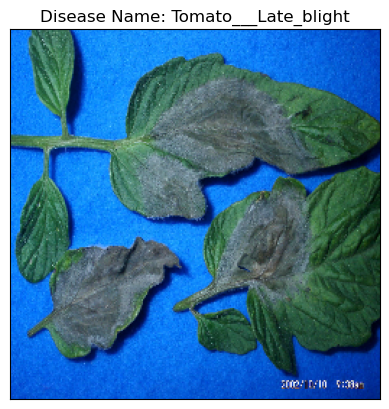

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('tomato_disease_model.h5')

def preprocess_image(image_path, target_size=(256,256)):
    try:
        # Read and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = img / 255.0  # Normalize pixel values
        return img
    except Exception as e:
        print("Error processing image:", e)
        return None

def predict_disease(image_arr, model, class_names):
    try:
        # Make prediction
        prediction = model.predict(np.array([image_arr]))
        result_index = np.argmax(prediction)
        predicted_class = class_names[result_index]
        return predicted_class
    except Exception as e:
        print("Error predicting disease:", e)
        return None

# Test image path
image_path = "testing.jpg"

# Preprocess the image
input_img = preprocess_image(image_path)
if input_img is not None:
    # Get class names
    class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                   'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                   'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
                   'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

    # Make prediction
    predicted_class = predict_disease(input_img, model, class_names)
    if predicted_class is not None:
        # Display image with prediction
        plt.imshow(input_img)
        plt.title(f"Disease Name: {predicted_class}")
        plt.xticks([])
        plt.yticks([])
        plt.show()
